In [1]:
#Instalo e importo paquetes 
!pip install pandas

import pandas as pd 
import numpy as np 
import os

from IPython.display import Image, display, HTML

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.gridspec import GridSpec

import seaborn as sns

import statsmodels.api as sm     

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import PolynomialFeatures 

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score

from scipy import stats
from scipy.stats import ttest_ind

from ISLP import load_data





In [2]:
## Base total de EPH depurada en TP3  ##############

union_eph = pd.read_excel('union_eph.xlsx')
#union_eph

In [4]:

# Contenido HTML que deseas mostrar
html_txt = """
<h3 style="color: navy">A. Enfoque de validación </h3>
<p> 
Utilicen la base respondieron. Para cada año, dividan las observaciones en una base de prueba (test) y una de entrenamiento (train) <br>
utilizando el comando train_test_split. <br>
La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (random state instance) debe ser 444. <br>
Establezca a pobre como su variable dependiente en la base de entrenamiento (vector y). <br>
El resto de las variables seleccionadas serán las variables independientes (matriz X). <br>
Recuerden agregar la columna de unos (1) para el intercepto. <br>
Aclaración: no incluir la variable ingreso en X para predecir la pobreza <br>
porque cuando vayamos a la base de norespondieron no vamos a tener esa información. 
</p>

"""

# Mostrar el contenido HTML
display(HTML(html_txt))





In [6]:

# Hay valores faltantes?
print("\n Missings:\n", union_eph_sd.isnull().sum()) # conteo




 Missings:
 CODUSU                   0
NRO_HOGAR                0
REGION                   0
AGLOMERADO               0
PONDERA                  0
CH03                     0
CH04                     0
CH06                     0
CH07                     0
CH08                     0
CH12                  4074
CH13                  2964
CH14                 23658
NIVEL_ED                 0
ESTADO                   0
CAT_OCUP             23875
CAT_INAC             42013
PP3E_TOT             56383
PP3F_TOT             24956
PP04B_COD            53062
P21                      0
ITF                      0
IPCF                     0
ANIO                     0
IV1                    487
IV2                      0
IV6                  41768
IV8                  46203
II8                    885
pobre                72387
ingreso_necesario    72387
ad_equiv_hogar       72387
EDAD_2                   0
EDUC                     0
ITF_05_25                0
horastrab            56363
dtype: int64


In [7]:
# Filtrar los nulas de las variables que voy a incluir como variables explicativas
union_eph = union_eph_sd[    (union_eph_sd['ITF'] != 0) & (union_eph_sd['II8'].notna()) & (union_eph_sd['IV1'].notna()) ]

In [5]:

html_txt = """
<h3 style="color: navy">A1 </h3>
<p> 
Para la matriz de las X seleccione variables que hayan limpiado en los TPs anteriores y justifique su inclusión para predecir la pobreza. <br>

Cree una tabla de diferencia de medias entre la base de entrenamiento y la de testeo de las características seleccionadas en su matriz X.<br> 

Comente la tabla de la diferencia de medias de sus variables entre entrenamiento y testeo. <br>

¿Hay diferencias significativas entre las medias del entrenamiento y testeo? 
</p>

"""

# Muestra el contenido HTML
display(HTML(html_txt))

In [42]:
html_txt = """
<h3 style="color: navy">Rta A1 </h3>
<p> 
Para predecir la pobreza, la matriz X, debe incluir los siguietes Predictores:<br>
'CH04'=sexo, 'CH06'=Edad, 'CH07'=Estado civil, 
'ESTADO'=Estado laboral, 'EDUC'=años de Educacion,
'IV1'= tipo de vivienda, 'IV2'= Ambientes de vivienda, 'II8'= Tipo de cocina
<br>
La EDAD es un factor relevante dado el ciclo de ingresos durante las diferentes etapas de la vida<br>
El nivel educativo de los integrantes del hogar podrían estar correlacionados e influye en los 
puestos de trabajo en los que se insertan por lo que podría tener una porcion explicativa <br>
La situación laboral podría ofrecer algun nivel explicativo dado que influye en el flujo de ingresos.
Se incluiyen las 3 dimensiones (IV1, IV2 y II8) de los criterios ampliados de la medicion de la pobreza que 
se encuentran con una cantidad de informacion suficiente. Pero finalmente solo me quedaré con IV2 porque las otras 2 (IV1 y II8) 
al hacerlas dicotomicas por categoria quedan con distintas cantidad de columnas en 2005 y 2025


</p>

"""
display(HTML(html_txt))

In [52]:

html_txt = """
<h3 style="color: navy">A2 </h3>
<p> 
Separen la base respondieron en dos: respondieron_2005 y respondieron_2025. Idem con la base norespondieron. </p>

"""

# Muestra el contenido HTML
display(HTML(html_txt))

In [29]:

# Filtrar filas donde 'ITF' fue respondida o no
union_eph_noresp = union_eph[union_eph['ITF'] == 0]
union_eph_resp = union_eph[union_eph['ITF'] != 0]

#Por AÑOS
union_eph_resp_2005 = union_eph_resp[union_eph_resp['ANIO'] == 2005]
union_eph_resp_2025 = union_eph_resp[union_eph_resp['ANIO'] == 2025]

#Por AÑOS
union_eph_noresp_2005 = union_eph_noresp[union_eph_noresp['ANIO'] == 2005]
union_eph_noresp_2025 = union_eph_noresp[union_eph_noresp['ANIO'] == 2025]



,CODUSU,NRO_HOGAR,REGION,AGLOMERADO,PONDERA,CH03,CH04,CH06,CH07,CH08,...,IV8,II8,pobre,ingreso_necesario,ad_equiv_hogar,EDAD_2,EDUC,ITF_05_25,horastrab,const
0,TQRMNOVQVHJOLOCDEFKID00875778,1,43,4,927,2,0,25,1,4,...,1.0,2.0,NaN,NaN,NaN,625,12,1028000.00,24.0,1
1,TQRMNOVQVHJOLOCDEFKID00875778,1,43,4,927,3,0,7,5,4,...,1.0,2.0,NaN,NaN,NaN,49,1,1028000.00,NaN,1
2,TQRMNOVQVHJOLOCDEFKID00875778,1,43,4,927,3,1,4,5,4,...,1.0,2.0,NaN,NaN,NaN,16,0,1028000.00,NaN,1
3,TQRMNOUPQHLOLOCDEFKID00851757,1,43,4,1294,1,0,29,5,4,...,1.0,2.0,NaN,NaN,NaN,841,15,690000.00,70.0,1
4,TQRMNOUPQHLOLOCDEFKID00851757,1,43,4,1294,3,0,13,5,4,...,1.0,2.0,NaN,NaN,NaN,169,5,690000.00,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91560,288015,1,44,31,129,3,0,16,5,1,...,NaN,1.0,NaN,NaN,NaN,256,11,2470608.00,NaN,1
91561,288015,1,44,31,129,3,1,12,5,1,...,NaN,1.0,NaN,NaN,NaN,144,7,2470608.00,NaN,1
91562,288294,1,44,31,107,1,1,43,1,1,...,NaN,1.0,NaN,NaN,NaN,1849,9,2644850.88,63.0,1
91563,288294,1,44,31,107,2,0,26,1,1,...,NaN,1.0,NaN,NaN,NaN,676,12,2644850.88,69.0,1


In [25]:
# SIGUE A1

#En el armado de las variables, me quedo con los datos de la region 40, que es para quienes calculamos a los pobres.
# La variable dependiente no puede tener missing
#Se dejará afuera a las entrevistas que no informaron su estado de situacion laboral (estado=0), que son 148, ya que será dummy.

#2005
y_05 = union_eph_resp_2005.loc[(union_eph_resp_2005['REGION'] == 40) & (union_eph_resp_2005['ESTADO'] != 0), ['pobre']]
x_05 = union_eph_resp_2005.loc[(union_eph_resp_2005['REGION'] == 40) & (union_eph_resp_2005['ESTADO'] != 0), ['CH04','CH06','CH07','ESTADO','IV2','EDUC']]

#2025
y_25 = union_eph_resp_2025.loc[(union_eph_resp_2025['REGION'] == 40) & (union_eph_resp_2025['ESTADO'] != 0), ['pobre']]
x_25 = union_eph_resp_2025.loc[(union_eph_resp_2025['REGION'] == 40) & (union_eph_resp_2025['ESTADO'] != 0), ['CH04','CH06','CH07','ESTADO','IV2','EDUC']]


#Reseteo el index para que no queden agujeros por lo quitado hasta aquí

union_eph_resp_2005 = union_eph_resp_2005.reset_index(drop=True)
union_eph_resp_2025 = union_eph_resp_2025.reset_index(drop=True)


#Hay que verificar las dimensiones porque train_test_split necesita igual nro de filas

print("Dimensiones de x_05:", x_05.shape)
print("Dimensiones de y_05:", y_05.shape)

print("Dimensiones de x_25:", x_25.shape)
print("Dimensiones de y_25:", y_25.shape)

# Hay valores faltantes?
print("\n Missings:\n", y_25.isnull().sum()) 
print("\n Missings:\n", y_05.isnull().sum())


Dimensiones de x_05: (8568, 6)
Dimensiones de y_05: (8568, 1)
Dimensiones de x_25: (8630, 6)
Dimensiones de y_25: (8630, 1)

 Missings:
 pobre    0
dtype: int64

 Missings:
 pobre    0
dtype: int64


In [35]:
# Convierto a las variables categoricas, con mas de 2 categorias, en variables dummies por cada una de sus categorias
#CH04 es categorica pero solo tiene 2 opciones

x_05_c_dummy = pd.get_dummies(x_05, columns=['CH07', 'ESTADO'], drop_first=True)
x_25_c_dummy = pd.get_dummies(x_25, columns=['CH07', 'ESTADO'], drop_first=True)

x_05_c_dummy = sm.add_constant(x_05_c_dummy)
x_25_c_dummy = sm.add_constant(x_25_c_dummy)


x_05_c_dummy


,const,CH04,CH06,IV2,EDUC,CH07_2,CH07_3,CH07_4,CH07_5,ESTADO_2,ESTADO_3,ESTADO_4
54550,1.0,1,53,6,17,True,False,False,False,False,False,False
54551,1.0,0,52,6,17,True,False,False,False,False,False,False
54552,1.0,1,16,6,11,False,False,False,True,False,True,False
54553,1.0,0,84,3,7,False,False,True,False,False,True,False
54554,1.0,0,19,3,12,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
63784,1.0,0,10,4,4,False,False,False,True,False,True,False
63785,1.0,1,31,4,14,True,False,False,False,False,False,False
63786,1.0,0,29,4,14,True,False,False,False,False,True,False
63787,1.0,1,4,4,0,False,False,False,True,False,False,True


In [36]:
x_25_c_dummy

,const,CH04,CH06,IV2,EDUC,CH07_2,CH07_3,CH07_4,CH07_5,ESTADO_2,ESTADO_3,ESTADO_4
30,1.0,0,73,4,7,False,False,False,True,False,True,False
31,1.0,0,38,4,12,False,False,False,True,False,False,False
32,1.0,0,34,4,14,False,False,False,True,False,False,False
33,1.0,1,19,4,9,False,False,False,True,False,True,False
34,1.0,1,16,4,7,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
45135,1.0,0,90,3,12,False,False,True,False,False,True,False
45136,1.0,0,60,3,17,False,False,False,True,False,False,False
45137,1.0,0,22,3,15,False,False,False,True,False,True,False
45138,1.0,1,25,1,7,False,False,False,False,False,False,False


In [37]:

# Una vez seleccionado, y limpiado, a las variables podemos particionar la base en entrenamiento (train) y testeo (test) 

#union_eph_resp_2005 
x_train_2005, x_test_2005, y_train_2005, y_test_2005 = train_test_split(x_05_c_dummy, y_05, test_size=0.7, random_state=444)

#union_eph_resp_2025
x_train_2025, x_test_2025, y_train_2025, y_test_2025 = train_test_split(x_25_c_dummy, y_25, test_size=0.7, random_state=444)


In [49]:
html_txt = """
<p> 
El dataset parece bien balanceado entre train y test en la mayoría de las variables.Las diferencias detectadas son pequeñas en magnitud.
Merece una mencion CH04 (Sexo): diferencia en 2005 (0.502 vs 0.473 en medias) es pequeña pero significativa (p=0.017). En 2025, la diferencia es mínima y no significativa
<br>
Es bueno para que el modelo generalice bien y no esté sesgado por diferencias en la proporción entre train y test.
</p>

"""

# Mostrar el contenido HTML
display(HTML(html_txt))

In [41]:

# Lista explícita de columnas relevantes
columnas_x = [
    'CH04',	'CH06',	'IV2',	'EDUC',	'CH07_2',	'CH07_3',	'CH07_4',	'CH07_5',	'ESTADO_2',	'ESTADO_3',	'ESTADO_4'
]

def tabla_diferencia_medias(x_train, x_test, columnas):
    # Filtramos solo las columnas relevantes
    x_train_filtrado = x_train[columnas]
    x_test_filtrado = x_test[columnas]
    
    # Calculamos medias
    medias_train = x_train_filtrado.mean()
    medias_test = x_test_filtrado.mean()
    
    # Creamos tabla
    tabla = pd.DataFrame({
        'Media Train': medias_train,
        'Media Test': medias_test,
        'Diferencia (Train - Test)': medias_train - medias_test
    })
    
    return tabla.round(4)

tabla_2005 = tabla_diferencia_medias(x_train_2005, x_test_2005, columnas_x)
tabla_2025 = tabla_diferencia_medias(x_train_2025, x_test_2025, columnas_x)

tabla_2025


,Media Train,Media Test,Diferencia (Train - Test)
CH04,0.4851,0.4787,0.0064
CH06,35.5716,35.4918,0.0798
IV2,3.6041,3.6699,-0.0658
EDUC,9.9869,9.8020,0.1848
CH07_2,0.1773,0.1801,-0.0028
CH07_3,0.0633,0.0548,0.0086
CH07_4,0.0406,0.0455,-0.0050
CH07_5,0.5732,0.5670,0.0062
ESTADO_2,0.0255,0.0214,0.0041
ESTADO_3,0.4280,0.4165,0.0115


In [42]:
tabla_2005

,Media Train,Media Test,Diferencia (Train - Test)
CH04,0.5016,0.4733,0.0282
CH06,30.6405,30.8276,-0.1871
IV2,3.5696,3.6000,-0.0304
EDUC,8.0973,8.2074,-0.1101
CH07_2,0.2568,0.2578,-0.0009
CH07_3,0.0370,0.0403,-0.0034
CH07_4,0.0467,0.0463,0.0003
CH07_5,0.5665,0.5554,0.0112
ESTADO_2,0.0490,0.0495,-0.0005
ESTADO_3,0.3918,0.4058,-0.0140


In [44]:

# Transformo para que los x_train y x_test sean DataFrames con nombres de columnas

x_train_05 = pd.DataFrame(x_train_2005, columns=['CH04',	'CH06',	'IV2',	'EDUC'] + [f'CH07_{i}' for i in range(2, 6)]+ [f'ESTADO_{i}' for i in range(2, 5)])
x_train_25 = pd.DataFrame(x_train_2025, columns=['CH04',	'CH06',	'IV2',	'EDUC'] + [f'CH07_{i}' for i in range(2, 6)]+ [f'ESTADO_{i}' for i in range(2, 5)])

x_test_05 = pd.DataFrame(x_test_2005, columns=['CH04',	'CH06',	'IV2',	'EDUC'] + [f'CH07_{i}' for i in range(2, 6)]+ [f'ESTADO_{i}' for i in range(2, 5)])
x_test_25 = pd.DataFrame(x_test_2025, columns=['CH04',	'CH06',	'IV2',	'EDUC'] + [f'CH07_{i}' for i in range(2, 6)]+ [f'ESTADO_{i}' for i in range(2, 5)])


# Estadísticos por columna

estadisticos_x = pd.DataFrame({
    'N train 2005': x_train_05.shape[0],
    'Mean train 2005': x_train_05.mean(),
    'sd train 2005': x_train_05.std(),
    'N test 2005': x_test_05.shape[0],
    'Mean test 2005': x_test_05.mean(),
    'sd test 2005': x_test_05.std(),

    'N train 2025': x_train_25.shape[0],
    'Mean train 2025': x_train_25.mean(),
    'sd train 2025': x_train_25.std(),
    'N test 2025': x_test_25.shape[0],
    'Mean test 2025': x_test_25.mean(),
    'sd test 2025': x_test_25.std(),
})



# t-test por cada columna de X
t_tests_x_05 = x_train_05.columns.to_series().apply(
    lambda col: stats.ttest_ind(x_train_05[col], x_test_05[col], equal_var=False)
)

t_tests_x_25 = x_train_25.columns.to_series().apply(
    lambda col: stats.ttest_ind(x_train_25[col], x_test_25[col], equal_var=False)
)


# Agregamos t-test y p-value a estadisticos_x
estadisticos_x['t-test 05'] = t_tests_x_05.apply(lambda res: res.statistic)
estadisticos_x['t-test 25'] = t_tests_x_25.apply(lambda res: res.statistic)

estadisticos_x['p-value 05'] = t_tests_x_05.apply(lambda res: res.pvalue)
estadisticos_x['p-value 25'] = t_tests_x_25.apply(lambda res: res.pvalue)

# Redondeo
estadisticos_x = estadisticos_x.round(3)

# Exporta a Excel
estadisticos_x.to_excel('dif_medias.xlsx')

In [45]:
estadisticos_x

,N train 2005,Mean train 2005,sd train 2005,N test 2005,Mean test 2005,sd test 2005,N train 2025,Mean train 2025,sd train 2025,N test 2025,Mean test 2025,sd test 2025,t-test 05,t-test 25,p-value 05,p-value 25
CH04,2570,0.502,0.500,5998,0.473,0.499,2589,0.485,0.500,6041,0.479,0.500,2.396,0.545,0.017,0.586
CH06,2570,30.640,21.262,5998,30.828,21.169,2589,35.572,21.090,6041,35.492,21.427,-0.374,0.160,0.709,0.873
IV2,2570,3.570,1.467,5998,3.600,1.441,2589,3.604,4.389,6041,3.670,5.376,-0.883,-0.595,0.377,0.552
EDUC,2570,8.097,4.956,5998,8.207,4.929,2589,9.987,4.600,6041,9.802,4.618,-0.944,1.709,0.345,0.088
CH07_2,2570,0.257,0.437,5998,0.258,0.437,2589,0.177,0.382,6041,0.180,0.384,-0.002,-0.005,NaN,NaN
CH07_3,2570,0.037,0.189,5998,0.040,0.197,2589,0.063,0.244,6041,0.055,0.228,-0.012,0.026,NaN,NaN
CH07_4,2570,0.047,0.211,5998,0.046,0.210,2589,0.041,0.197,6041,0.046,0.208,0.001,-0.017,NaN,NaN
CH07_5,2570,0.567,0.496,5998,0.555,0.497,2589,0.573,0.495,6041,0.567,0.496,0.016,0.009,NaN,NaN
ESTADO_2,2570,0.049,0.216,5998,0.050,0.217,2589,0.025,0.158,6041,0.021,0.145,-0.002,0.019,NaN,NaN
ESTADO_3,2570,0.392,0.488,5998,0.406,0.491,2589,0.428,0.495,6041,0.416,0.493,-0.020,0.016,NaN,NaN


In [71]:
html_txt = """
<h3 style="color: navy">B. Modelo de Regresion Logística</h3>
<h4 style="color: navy">B.3 - Estimación y Efectos Marginales</h4>
<p> 
Estimen una Regresión Logística usando x_train de respondieron_2025. Exporten una tabla con: <br> 
(i) los coeficientes estimados para cada variable, <br>
(ii) los errores estándar y los odd-ratios. <br>
Interpreten los resultados de la tabla. (Hint: en la clase 6 hay una ilustración de la tabla).

</p>

"""

# Mostrar el contenido HTML
display(HTML(html_txt))




In [46]:
logit_model = sm.Logit(y_train_2025.astype(float),x_train_2025.astype(float))
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.618455
         Iterations 6
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: pobre            Pseudo R-squared: 0.097     
Date:               2025-11-09 13:05 AIC:              3226.3613 
No. Observations:   2589             BIC:              3296.6697 
Df Model:           11               Log-Likelihood:   -1601.2   
Df Residuals:       2577             LL-Null:          -1774.1   
Converged:          1.0000           LLR p-value:      1.8309e-67
No. Iterations:     6.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const          2.5247    0.2708   9.3237  0.0000   1.9940   3.0554
CH04          -0.0300    0.0875  -0.3434  0.7313  -0.2015   0.

In [ ]:
Interpretación: <br>  
El Pseudo R cuadrado = 0.091 nos alerta sobre que el modelo explica poco de la varianza. 
Pero tambien el LLR p-value nos dice que los predictores son significativos en su conjunto.
La constante nos marca una alta probabilidad de pobreza. Es decir, sin la influencia de las otras variables se parte de un escenario con alta probabilidad de pobreza. 
Casi todas la variables reducen la probabilidad de pobreza, salvo ESTADO_2 (desocupado) y ESTADO_3 (inactivo) que aumentan la probabilidad de pobreza.
Variable no significativa: CH07_3 (separad@s)


In [53]:
os.getcwd()

coef = result.params
std_err = result.bse
odds_ratios = np.exp(coef)

# Creo un DataFrame combinado con los 3
df_expo = pd.DataFrame({
    'Coeficiente': coef,
    'Error estándar': std_err,
    'Odds Ratio': odds_ratios
})

# Exporto
df_expo.to_excel('resultados_logistico.xlsx')


In [48]:

# Estimacion de los coeficientes
print(coef)
print(std_err)
print(odds_ratios)

const       2.524682
CH04       -0.030048
CH06       -0.027387
IV2        -0.119276
EDUC       -0.102686
CH07_2     -0.525022
CH07_3     -0.280786
CH07_4     -1.206842
CH07_5     -0.647216
ESTADO_2    1.520155
ESTADO_3    0.466951
ESTADO_4   -0.892209
dtype: float64
const       0.270782
CH04        0.087494
CH06        0.003224
IV2         0.033564
EDUC        0.013555
CH07_2      0.157904
CH07_3      0.203982
CH07_4      0.298129
CH07_5      0.135213
ESTADO_2    0.292312
ESTADO_3    0.100576
ESTADO_4    0.224466
dtype: float64
const       12.486918
CH04         0.970399
CH06         0.972984
IV2          0.887563
EDUC         0.902411
CH07_2       0.591543
CH07_3       0.755190
CH07_4       0.299140
CH07_5       0.523501
ESTADO_2     4.572933
ESTADO_3     1.595123
ESTADO_4     0.409750
dtype: float64


In [73]:
html_txt = """
<h4 style="color: navy">B.4 - Visualización</h4>
<p> 
Grafiquen la P ̂(Y=1|X) (en el eje vertical) y alguna característica numérica (en el eje horizontal). 
Comente dicho gráfico y la variable seleccionada para ilustrar la probabilidad de ser pobre según la característica seleccionada

</p>

"""

# Mostrar el contenido HTML
display(HTML(html_txt))

In [77]:
html_txt = """
<h4 style="color: navy">B.4 - Comentario</h4>
<p> 
Se tomo a la variable Edad (CH06) de la matriz x_train_2025 como caracteristica númerica ya que figura como significativa. 
</p>

En el grafico que relaciona a la probabilidad de que sea pobre dado la edad se puede observa una linea azul descendente, 
confirmando lo que se viene sosteniendo,
que a menor edad es mayor la probabilidad de ser pobre.
</p>

"""

# Mostrar el contenido HTML
display(HTML(html_txt))





C:\Users\rodol\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


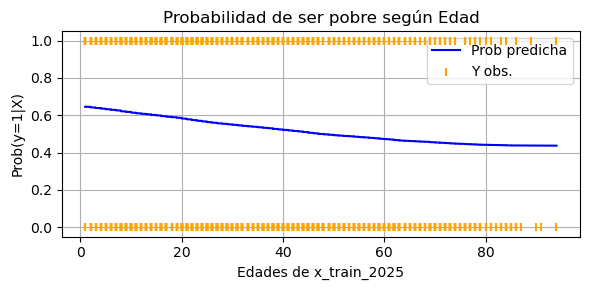

In [55]:

# Suponiendo que x_train_2025 y y_train_2025 ya están definidos y son DataFrames/arrays válidos
x_train_2025_ch06 = x_train_2025[['CH06']].astype(float)
y_train_2025 = np.array(y_train_2025).flatten()

# Crear y ajustar el modelo
logit_model2 = LogisticRegression(penalty=None,fit_intercept=True)  
logit_model2.fit(x_train_2025_ch06, y_train_2025)

# Obtener las probabilidades predichas
y_pred_score_sm = logit_model2.predict_proba(x_train_2025_ch06)[:, 1]

# Ordenar los valores de X
x_sorted = np.sort(x_train_2025_ch06, axis=0).flatten()

# Calcular las probabilidades acumuladas
y_pred_score_sorted = logit_model2.predict_proba(x_sorted.reshape(-1, 1))[:, 1]
probabilidad_acumulada = np.cumsum(y_pred_score_sorted) / np.arange(1, len(y_pred_score_sorted) + 1)

# Gráfico de resultados
plt.figure(figsize=(6,3))

plt.plot(x_sorted, probabilidad_acumulada, color='blue', zorder=10, label='Prob predicha')
plt.scatter(x_train_2025_ch06, y_train_2025, color='orange', zorder=20, marker="|", label='Y obs.' )
plt.xlabel('Edades de x_train_2025')
plt.ylabel('Prob(y=1|X)')
plt.legend()
plt.title('Probabilidad de ser pobre según Edad')
plt.grid()  # Añadir una cuadrícula para mejor visualización
plt.tight_layout()  # Ajustar el layout para que no se corten los elementos
plt.show()


In [56]:


print('Promedio de predicción Prob(y=1|X): ', y_pred_score_sm.mean().round(3))
print('Min de predicción Prob(y=1|X): ', y_pred_score_sm.min())
print('Max de predicción Prob(y=1|X): ', y_pred_score_sm.max())

# Clasificador de Bayes
y_pred_bayes = np.where(y_pred_score_sm>0.5, 1, y_pred_score_sm)
y_pred_bayes = np.where(y_pred_score_sm<=0.5, 0, y_pred_score_sm)
print(y_pred_bayes)



Promedio de predicción Prob(y=1|X):  0.437
Min de predicción Prob(y=1|X):  0.14770820531292791
Max de predicción Prob(y=1|X):  0.6458545261995199
[0.         0.         0.62237432 ... 0.52366363 0.511026   0.        ]


In [ ]:
Efectivamente nuestra predicción de la probabilidad Prob(y=1|X) esta en el rango

C:\Users\rodol\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


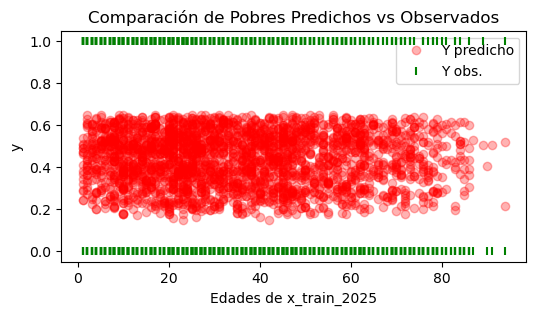

In [117]:
# Con este grafico visualizamos 'y' observado e 'y' predicho
plt.figure(figsize=(6, 3))

y_pred_score_sorted = logit_model2.predict_proba(x_sorted.reshape(-1,1))[:,1]   

plt.scatter(x_train_2025_ch06, y_pred_score_sorted, color='red', alpha=0.3, zorder=20, label='Y predicho')

plt.scatter(x_train_2025_ch06, y_train_2025, color='green', zorder=20, marker="|", label='Y obs.')

plt.xlabel('Edades de x_train_2025')
plt.ylabel('y')
plt.legend()

plt.title('Comparación de Pobres Predichos vs Observados')
plt.show()

In [ ]:
C. Método de Vecinos Cercanos (KNN)
5.	Estimación: Clasifiquen a las observaciones como “pobre”/“no pobre” en su región con Vecinos Cercanos (KNN) usando  K={1,5,10} 
para su matriz x_train de respondieron_2025. Expliquen en no más de 2-3 oraciones cómo la elección de K se relaciona con el trade-off sesgo varianza.  


In [ ]:
En el rango indicado se logra un pico de precision en el K=9.
La elección del valor de K en KNN es un balance delicado entre sesgo y varianza. 
Un K pequeño puede resultar en un modelo que se ajusta demasiado a los datos de entrenamiento (alta varianza), mientras que un 
K grande puede llevar a un modelo que no captura la complejidad de los datos (alto sesgo).

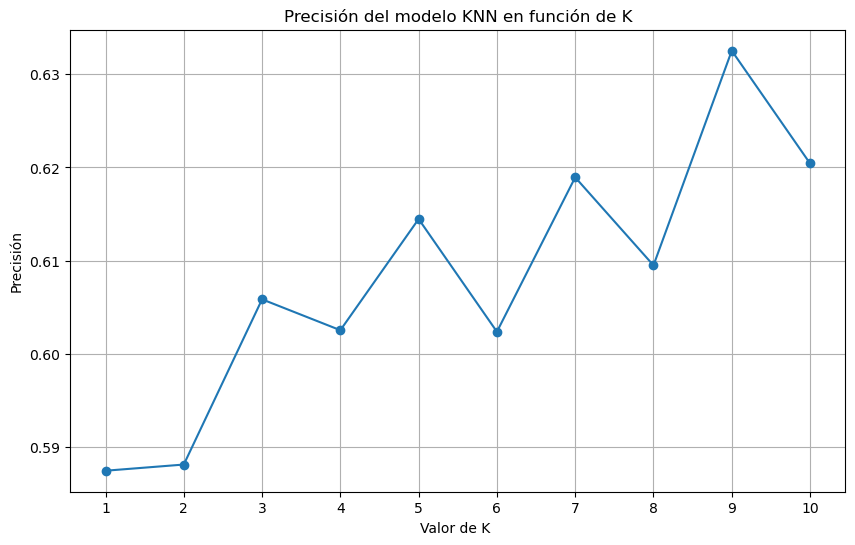

In [57]:
# Definimos k_range
k_range = [1,2,3,4,5,6,7,8,9, 10]
scores_list = []

# Entrenamos el modelo y calculamos la precisión para cada k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_2025, y_train_2025)
    y_test_pred_knn = knn.predict(x_test_2025)  # Predicciones
    
    # Calcula la precisión
    accuracy = accuracy_score(y_test_2025, y_test_pred_knn)
    scores_list.append(accuracy)  

plt.figure(figsize=(10, 6))
plt.plot(k_range, scores_list, marker='o')  
plt.title('Precisión del modelo KNN en función de K')
plt.xlabel('Valor de K ')
plt.ylabel('Precisión')
plt.xticks(k_range)  # para mostrar todos los valores de k
plt.grid()  # cuadrícula para facilitar la lectura
plt.show()  




In [ ]:
C. Método de Vecinos Cercanos (KNN)

6.	Visualización: Grafiquen dos características numéricas de su matriz x_train y visualicen las clases predichas por KNN usando con K=(1,10) 
con su frontera por clase “pobre”/“no pobre”.

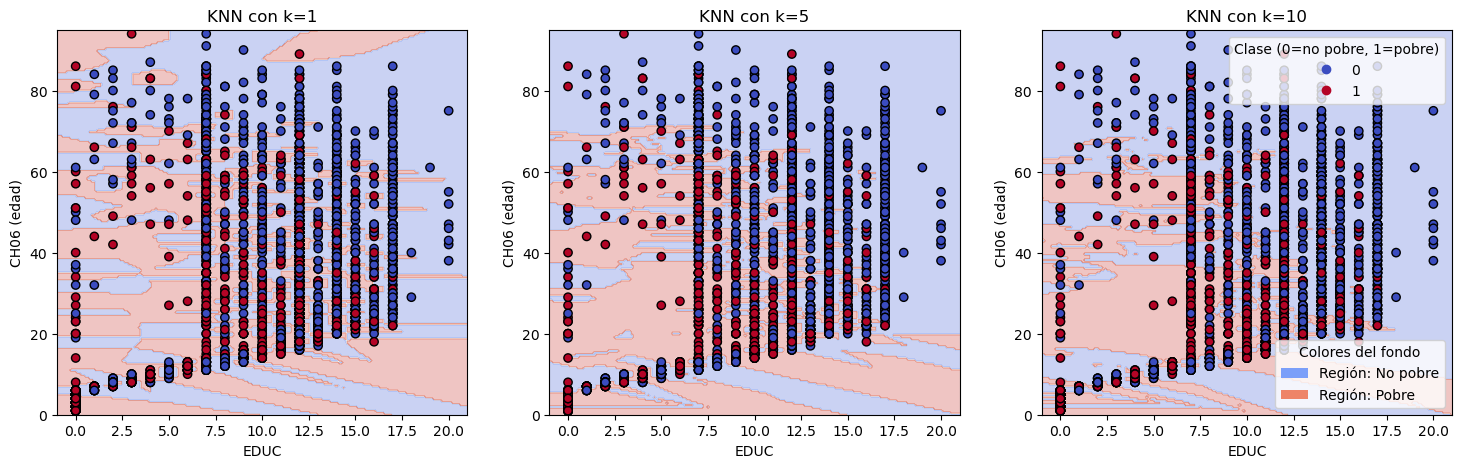

In [137]:


# Extraer solo EDUC y CH06
X_train_2d = x_train_2025[['EDUC', 'CH06']].values
y_train_2d = y_train_2025  # 0 = no pobre, 1 = pobre

# Definir rango de k
k_values = [1, 5, 10]

# Crear malla de puntos para graficar
x_min, x_max = X_train_2d[:,0].min() - 1, X_train_2d[:,0].max() + 1
y_min, y_max = X_train_2d[:,1].min() - 1, X_train_2d[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Colores para las clases
cmap = plt.cm.coolwarm

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_2d, y_train_2d)
    
    # Predicciones sobre la malla
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Dibujar frontera de decisión
    axes[i].contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    
    # Dibujar puntos originales
    scatter = axes[i].scatter(X_train_2d[:,0], X_train_2d[:,1],
                              c=y_train_2d, cmap=cmap, edgecolor='k')
    
    axes[i].set_title(f'KNN con k={k}')
    axes[i].set_xlabel('EDUC')
    axes[i].set_ylabel('CH06 (edad)')

# Leyenda para los puntos
legend1 = plt.legend(*scatter.legend_elements(), title="Clase (0=no pobre, 1=pobre)",
                     loc='upper right')

# Leyenda para los colores de fondo
legend2 = [Patch(facecolor=cmap(0.2), label="Región: No pobre"),
           Patch(facecolor=cmap(0.8), label="Región: Pobre")]
plt.legend(handles=legend2, title="Colores del fondo", loc='lower right')

# Agregar ambas leyendas
plt.gca().add_artist(legend1)

plt.show()

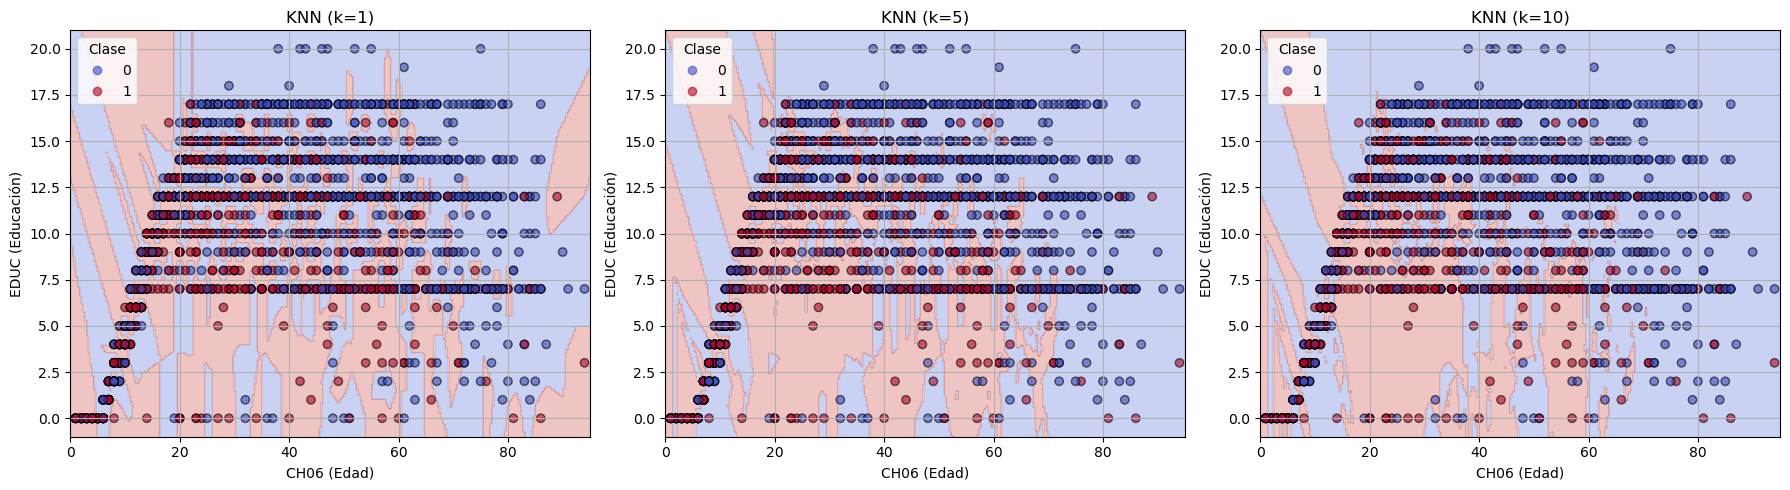

In [64]:
X = x_train_2025[["CH06", "EDUC"]].values
y = y_train_2025  # 0 = no pobre, 1 = pobre

import numpy as np

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # CH06
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # EDUC
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]


import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
ks = [1, 5, 10]
titles = [f"KNN (k={k})" for k in ks]

for ax, k, title in zip(axes, ks, titles):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X, y)
    Z = model.predict(grid).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolor="k", alpha=0.6)
    ax.set_title(title)
    ax.set_xlabel("CH06 (Edad)")
    ax.set_ylabel("EDUC (Educación)")
    ax.grid()
    ax.legend(*scatter.legend_elements(), title="Clase")

plt.tight_layout()


In [ ]:
C. Método de Vecinos Cercanos (KNN)

7.	K optimo por Cross-validation: Dividan la base x_train de respondieron_2025 en 5 partes (5-fold) para obtener el K óptimo por 
Cross-Validation con K=(1,10). Llamenle a este modelo KNN con K-CV. 
Grafiquen el accuracy de cada modelo y comenten cual es el número óptimo de vecinos cercanos para identificar pobres.

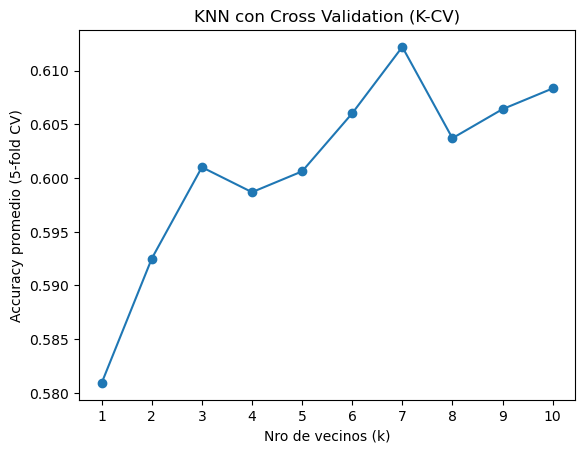

El K óptimo es 7 con accuracy promedio de 0.612


In [73]:

# Variables de entrenamiento
X = x_train_2025
y = y_train_2025

# Rango de k
k_range = range(1, 11)
cv_scores = []

# Validación cruzada 5-fold
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Graficar resultados
plt.plot(k_range, cv_scores, marker='o')
plt.xlabel('Nro de vecinos (k)')
plt.ylabel('Accuracy promedio (5-fold CV)')
plt.title('KNN con Cross Validation (K-CV)')
plt.xticks(k_range)
plt.show()

# Mejor k
best_k = k_range[np.argmax(cv_scores)]
print(f"El K óptimo es {best_k} con accuracy promedio de {max(cv_scores):.3f}")


